## The Sparks Foundation

### Graduate Rotational Internship Programme (GRIP)

#### `MAY 2023 Batch`
#### `Candidate Name : Mayur Korde`

### Task_7 : Stock Market Prediction using  Numerical & Textual Analysis 

In [4]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to C:\Users\prasad
[nltk_data]     jadhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\prasad
[nltk_data]     jadhav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Time Series Analysis

In [2]:
# Download the Dataset from the given links

# import pandas_datareader.data as pdr

# stock = pdr.DataReader('^BSESN', 'yahoo', start='2015-01-01', end='2023-5-10')

In [33]:
stock_df = pd.read_csv('BSE_SENSEX_1.csv')

In [34]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0.0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0.0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0.0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0.0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0.0


In [35]:
stock_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5909,2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600.0
5910,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800.0
5911,2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0
5912,2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900.0
5913,2021-01-01,47785.281250,47980.359375,47771.148438,47868.980469,47868.980469,0.0


In [36]:
stock_df.shape

(5914, 7)

In [37]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5914 non-null   object 
 1   Open       5786 non-null   float64
 2   High       5786 non-null   float64
 3   Low        5786 non-null   float64
 4   Close      5786 non-null   float64
 5   Adj Close  5786 non-null   float64
 6   Volume     5786 non-null   float64
dtypes: float64(6), object(1)
memory usage: 323.5+ KB


In [38]:
stock_df.isnull().sum()

Date           0
Open         128
High         128
Low          128
Close        128
Adj Close    128
Volume       128
dtype: int64

In [39]:
stock_df = stock_df.dropna()

In [40]:
stock_df.var()

Open         1.353554e+08
High         1.363859e+08
Low          1.336733e+08
Close        1.349926e+08
Adj Close    1.349926e+08
Volume       9.689581e+11
dtype: float64

In [41]:
stock_df.cov()

,Open,High,Low,Close,Adj Close,Volume
Open,1.353554e+08,1.358610e+08,1.344990e+08,1.351528e+08,1.351528e+08,1.109060e+09
High,1.358610e+08,1.363859e+08,1.350053e+08,1.356770e+08,1.356770e+08,1.112884e+09
Low,1.344990e+08,1.350053e+08,1.336733e+08,1.343212e+08,1.343212e+08,1.104064e+09
Close,1.351528e+08,1.356770e+08,1.343212e+08,1.349926e+08,1.349926e+08,1.108447e+09
Adj Close,1.351528e+08,1.356770e+08,1.343212e+08,1.349926e+08,1.349926e+08,1.108447e+09
Volume,1.109060e+09,1.112884e+09,1.104064e+09,1.108447e+09,1.108447e+09,9.689581e+11


In [42]:
stock_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999936,0.999905,0.999844,0.999844,0.096842
High,0.999936,1.000000,0.999871,0.999923,0.999923,0.096808
Low,0.999905,0.999871,1.000000,0.999925,0.999925,0.097011
Close,0.999844,0.999923,0.999925,1.000000,1.000000,0.096919
Adj Close,0.999844,0.999923,0.999925,1.000000,1.000000,0.096919
Volume,0.096842,0.096808,0.097011,0.096919,0.096919,1.000000


In [43]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5.786000e+03
mean,16450.535963,16551.969841,16316.395772,16431.636499,16431.636499,6.825510e+04
std,11634.233461,11678.436111,11561.718518,11618.631924,11618.631924,9.843567e+05
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,4792.437378,4839.955078,4731.725220,4770.300170,4770.300170,0.000000e+00
50%,15968.659668,16180.264649,15803.104981,15981.959961,15981.959961,1.210000e+04
75%,25881.975586,25979.287110,25658.887695,25838.568360,25838.568360,1.900000e+04
max,47789.031250,47980.359375,47771.148438,47868.980469,47868.980469,3.181510e+07


In [44]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0.0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0.0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0.0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0.0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0.0


In [45]:
stock_df = stock_df[['Date', 'High', 'Low', 'Open', 'Close', 'Volume']]

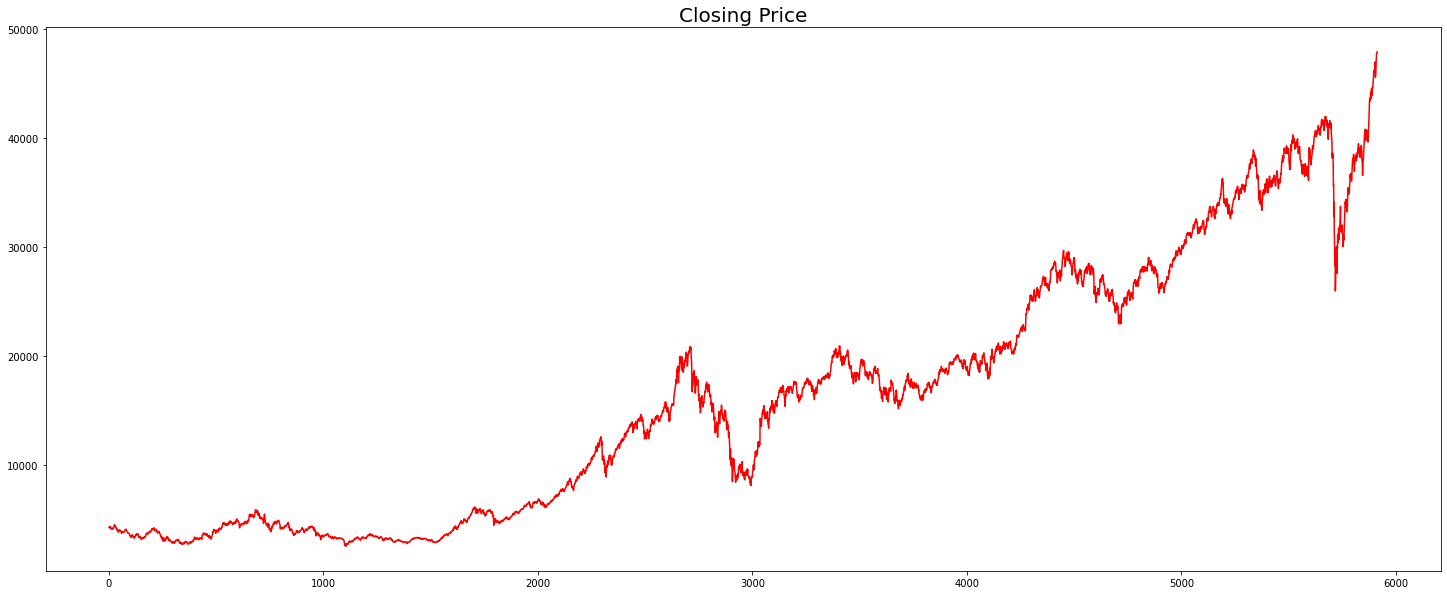

In [46]:
plt.figure(figsize=(25,10))
plt.plot(stock_df['Close'], label='Close Price History', color='red')
plt.title('Closing Price', fontsize=20)
plt.show()

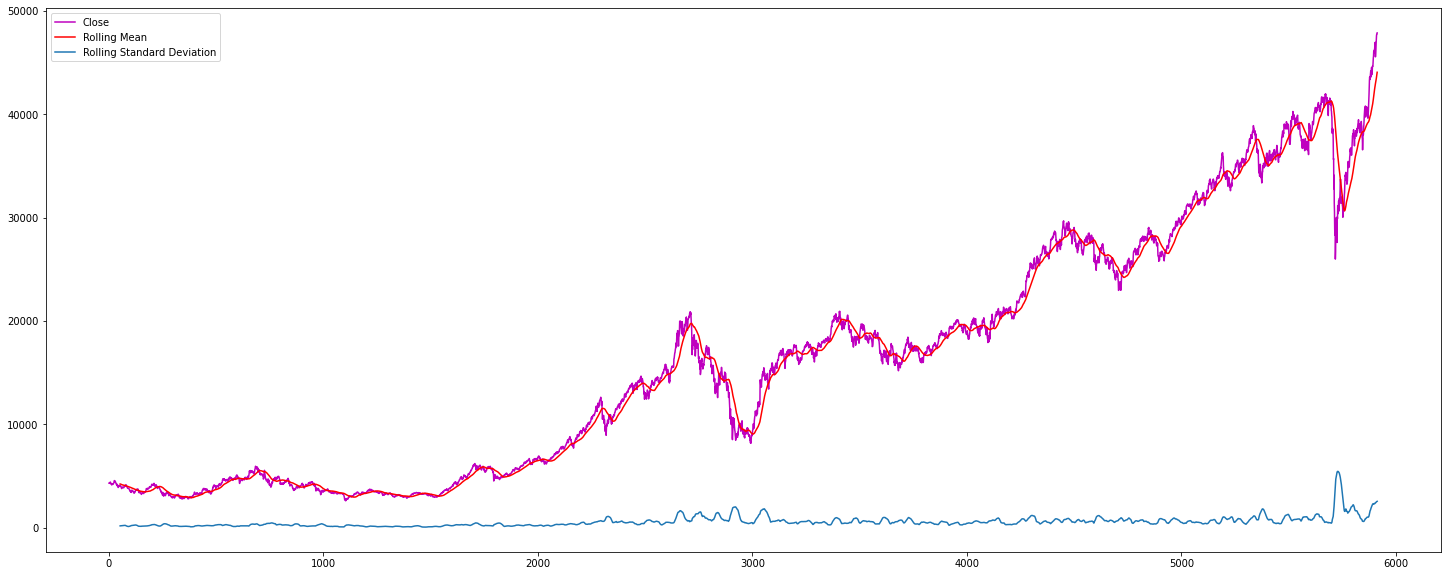

In [47]:
# Plotting Moving Average

close = stock_df['Close']
mean = close.rolling(window=50).mean()
std = close.rolling(window=50).std()

plt.figure(figsize=(25,10))
stock_df['Close'].plot(color='m', label='Close')
mean.plot(color='r', label='Rolling Mean')
std.plot(label='Rolling Standard Deviation')
plt.legend()
plt.show()

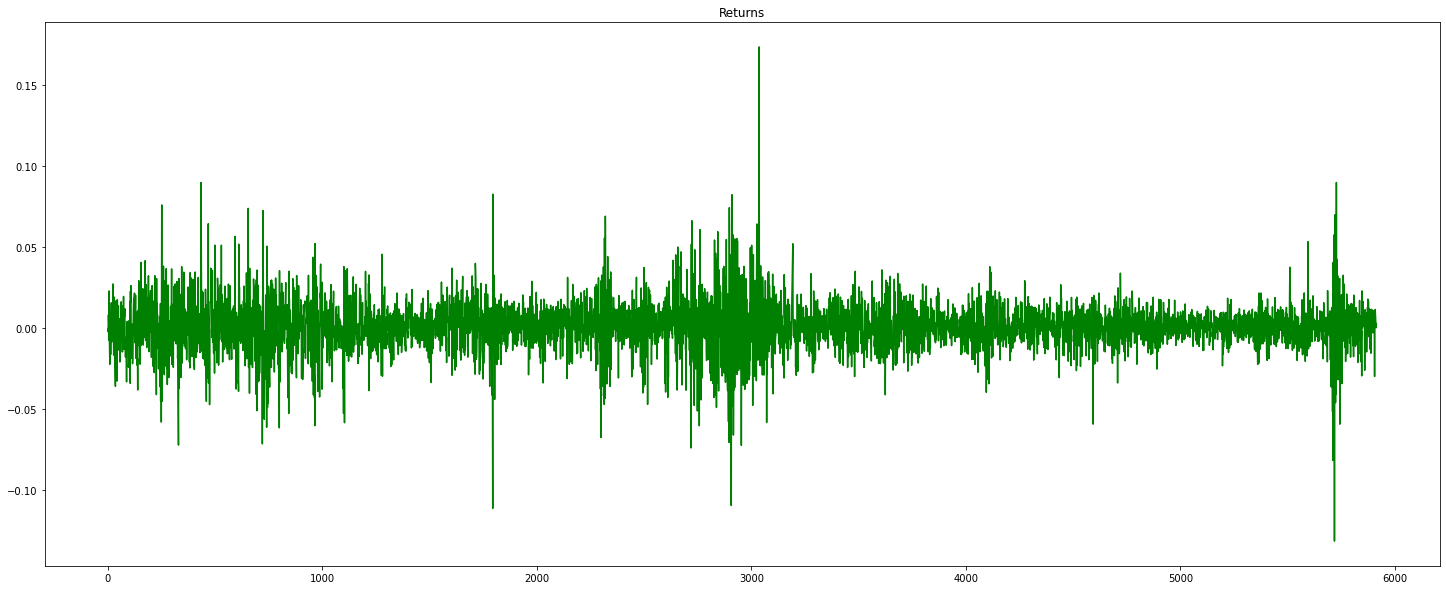

In [48]:
# Plotting Returns

returns = close / close.shift(1) - 1

plt.figure(figsize=(25,10))
returns.plot(label='Return', color='g')
plt.title('Returns')
plt.show()

In [49]:
stock_df.shape

(5786, 6)

In [50]:
# Spliting

train = stock_df[:3000]
test = stock_df[2000:]

In [51]:
# Stationary Test

# Defining the Function

def test_stationary(timeseries):
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()
    
# Plotting the Rolling Statistics

    plt.figure(figsize=(25,10))
    plt.plot(timeseries, color='m', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='green', label='Rolling Standard Deviation')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation', fontsize=20)
    plt.show(block=False)
    
    print('Result of Dickey Fuller Test')
    result = adfuller(timeseries, autolag='AIC')
    labels = ['ADF Test Statistics', 'p-value', 'Number of Lags Used', 'Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label +' : '+ str(value))

    if result[1] <= 0.05:
        print('Strong Evidence Against the NULL Hypothesis(H0) Reject the NULL Hypothesis Data is Stationary')
    else:
        print('Weak Evidence Againt NULL Hypothesis Time Series is NON-Stationary')

In [52]:
# Spliting

# train, test = stock_df[:2575], stock_df[2575:len(stock_df)]

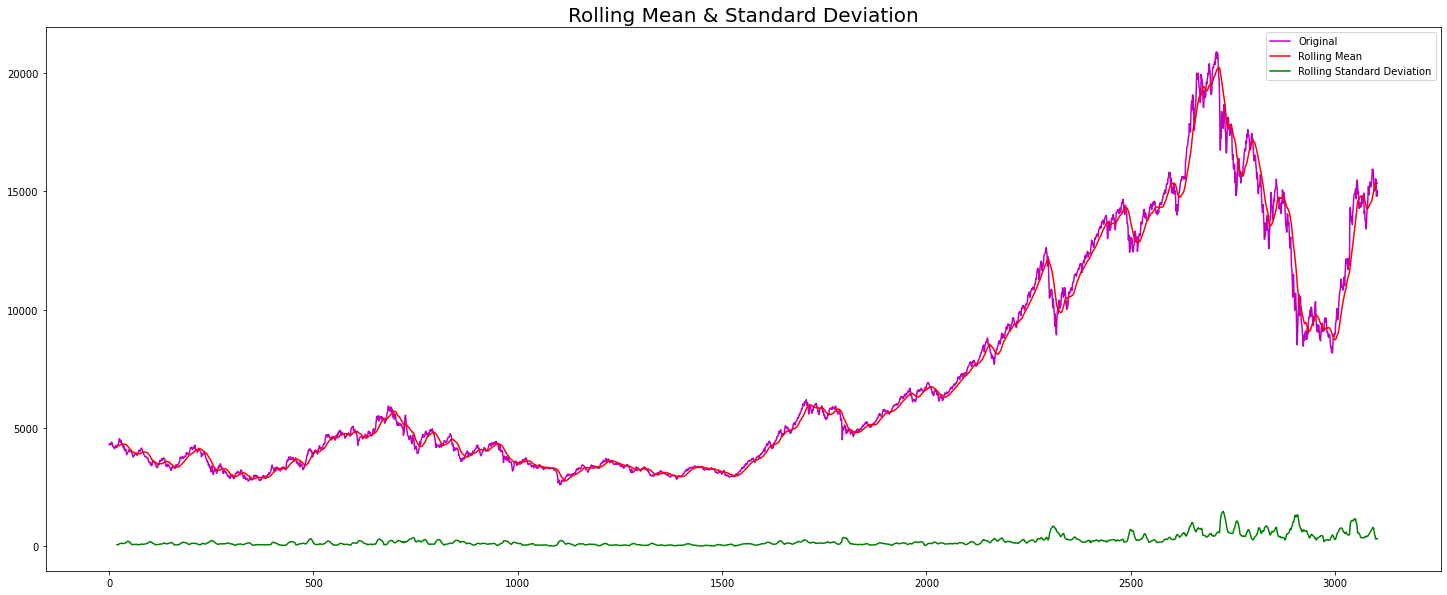

Result of Dickey Fuller Test
ADF Test Statistics : -0.6833843747131153
p-value : 0.8510065451677931
Number of Lags Used : 19
Number of Observations Used : 2980
Weak Evidence Againt NULL Hypothesis Time Series is NON-Stationary


In [53]:
test_stationary(train['Close'])

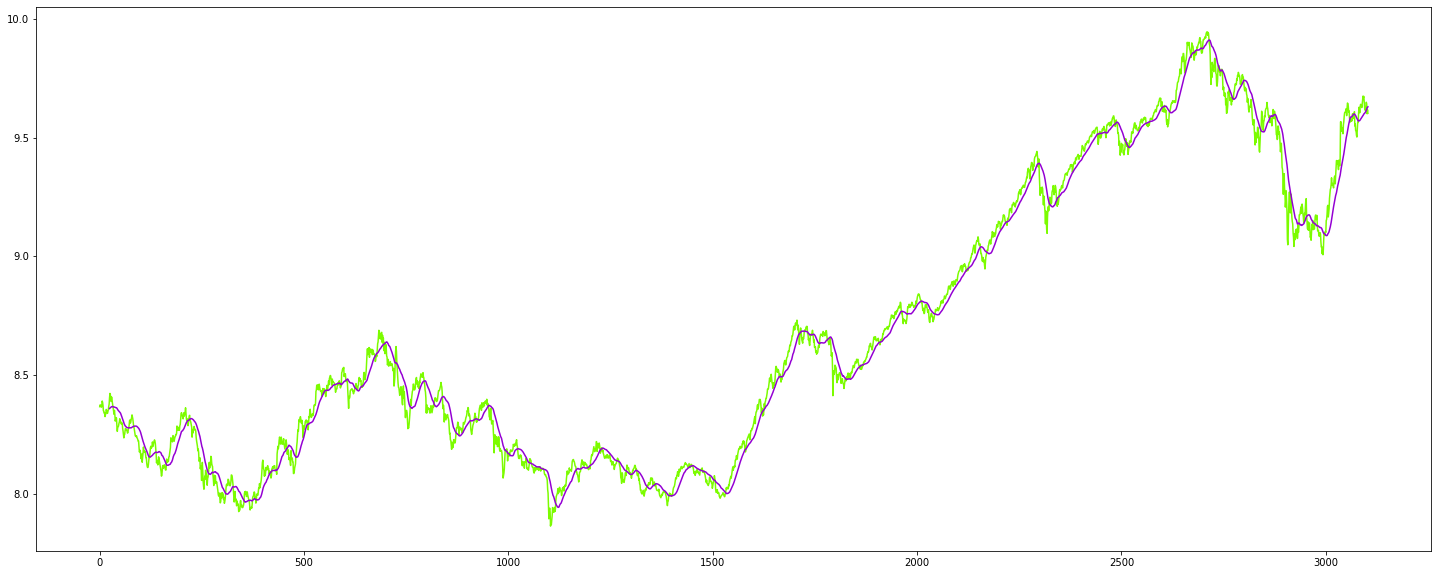

In [54]:
train_log = np.log(train['Close'])
test_log = np.log(test['Close'])

mean = train_log.rolling(25).mean()
plt.figure(figsize=(25,10))

plt.plot(train_log, color='lawngreen')
plt.plot(mean, color='darkviolet')

plt.show()

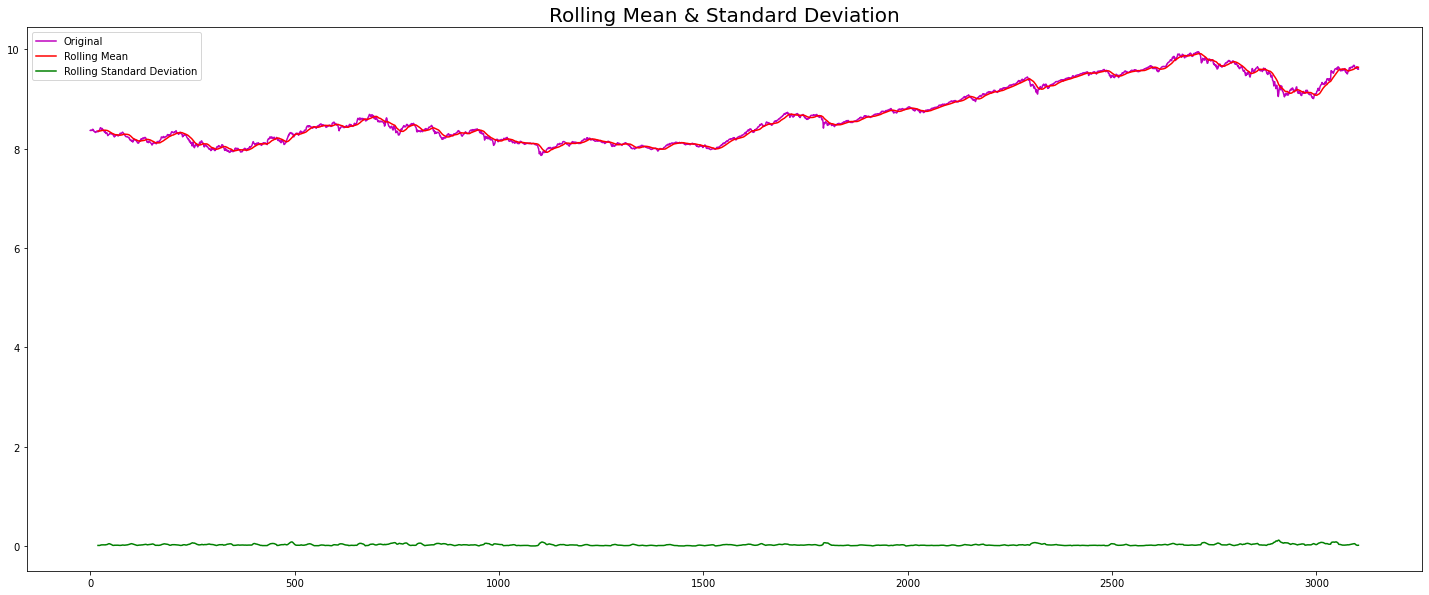

Result of Dickey Fuller Test
ADF Test Statistics : -0.3358598906351649
p-value : 0.9202697084151085
Number of Lags Used : 9
Number of Observations Used : 2990
Weak Evidence Againt NULL Hypothesis Time Series is NON-Stationary


In [55]:
test_stationary(train_log)

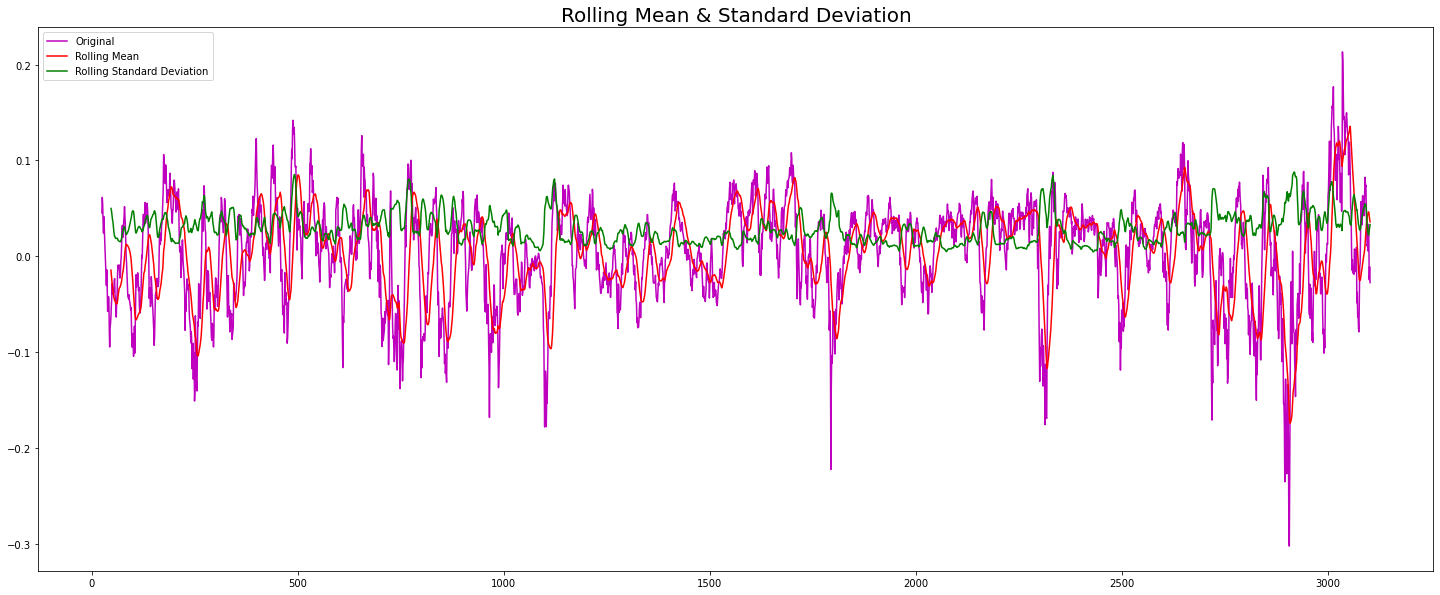

Result of Dickey Fuller Test
ADF Test Statistics : -8.063842450580804
p-value : 1.6160173649192978e-12
Number of Lags Used : 22
Number of Observations Used : 2953
Strong Evidence Against the NULL Hypothesis(H0) Reject the NULL Hypothesis Data is Stationary


In [56]:
train_log_diff = train_log - mean

train_log_diff.dropna(inplace=True)
test_stationary(train_log_diff)

`Model Building`

In [57]:
from pmdarima import auto_arima

In [58]:
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(train_log)

prediction = model.predict(n_periods=len(test))
prediction = pd.DataFrame(prediction, index=test_log.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15585.045, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15564.295, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15579.943, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15581.891, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15564.731, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15583.769, Time=1.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15584.384, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-15580.281, Time=1.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-15583.801, Time=2.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15583.899, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-15582.437, Time=0.96 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-15582.395, Time=0.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-15583.965, Time=4.25 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-15585.616, Time=0.99 sec
 ARIM

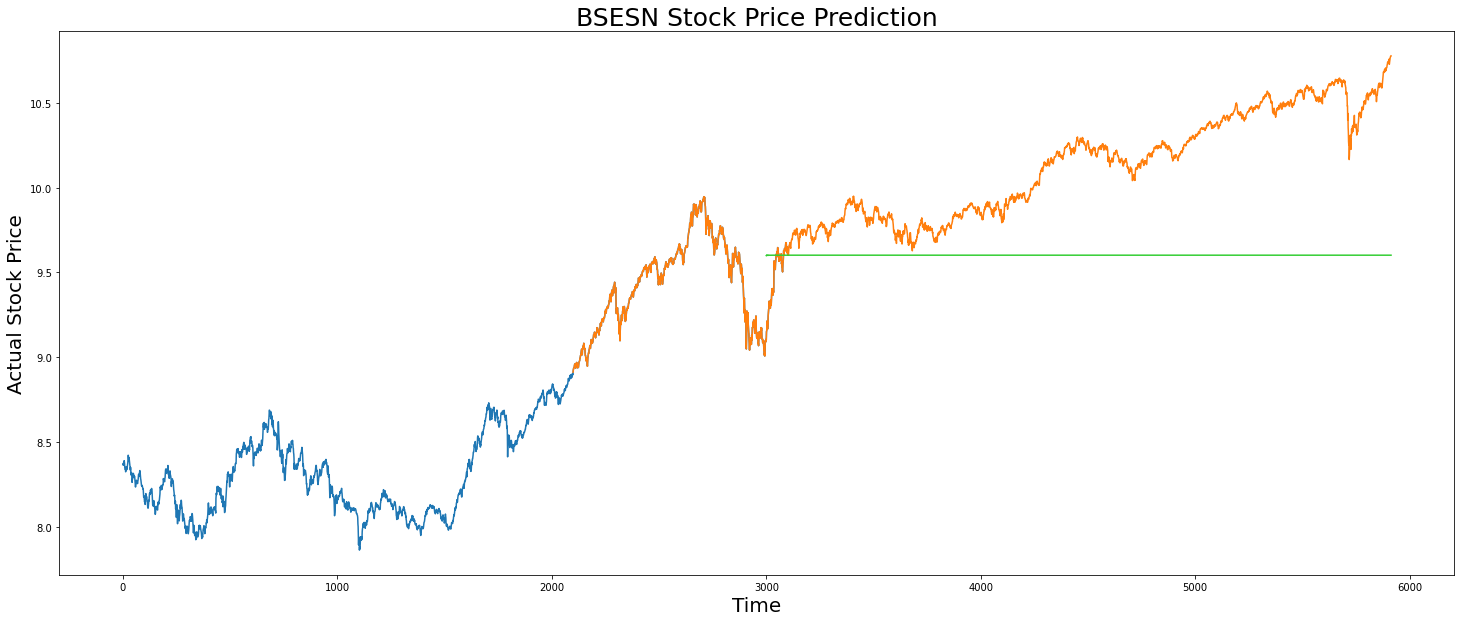

In [59]:
plt.figure(figsize=(25,10))
plt.plot(train_log,label='Train')
plt.plot(test_log,label='Test')
plt.plot(prediction, color='limegreen' ,label='Prediction')

plt.title('BSESN Stock Price Prediction', fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Actual Stock Price', fontsize=20)
plt.show()

In [ ]:
# rms = np.sqrt(mean_squared_error(test_log, prediction))
# print('RMSE:', rms)

`Temporary Merge`

In [79]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [50]:
temporary_merge = pd.merge(news_df, stock_df, how='inner', on='Date')

In [51]:
temporary_merge.head()

,Date,News,High,Low,Open,Close,Volume
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,4028.570068,3929.370117,3953.219971,4018.879883,0.0
1,2001-01-03,Powerless north India gropes in the dark Think...,4067.659912,3977.580078,3977.580078,4060.020020,0.0
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,4180.970215,4109.549805,4180.970215,4115.370117,0.0
3,2001-01-05,Light combat craft takes India into club class...,4195.009766,4115.350098,4116.339844,4183.729980,0.0
4,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...,4206.720215,4101.529785,4164.759766,4120.430176,0.0


In [52]:
temporary_merge.tail()

,Date,News,High,Low,Open,Close,Volume
4932,2021-03-01,Why Shine Shetty became logistics manager for ...,50058.421875,49440.460938,49747.710938,49849.839844,18400.0
4933,2021-03-02,Sudeep to Puneeth: 'Many more years to come an...,50439.820313,49807.121094,50258.089844,50296.890625,17500.0
4934,2021-03-03,Times 40 Under 40: Celebrating the game change...,51539.890625,50512.839844,50738.210938,51444.648438,15800.0
4935,2021-03-04,Diplomats term vaccine diplomacy a success; ey...,51256.550781,50539.921875,50812.140625,50846.078125,21800.0
4936,2021-03-05,Irfan Pathan's experience of shooting in Russi...,50886.191406,50160.539063,50517.359375,50405.320313,19200.0


In [53]:
def remove_special_chars(text):
    result = " "
    
    for i in text:
        if i.isalnum()  or i == ' ':
            result = result+i
        else:
            result = result + " "
    return result.strip()        

In [54]:
remove_special_chars('Microfin grows 43%; avoids liquidity woes')

'Microfin grows 43   avoids liquidity woes'

In [55]:
headlines_df = news_df

In [56]:
headlines_df['News'] = headlines_df['News'].apply(remove_special_chars)

In [57]:
headlines_df['News'] = headlines_df.groupby(['Date']).transform(lambda x: ' '.join(x))

In [58]:
headlines_df.sample(10)

,Date,News
1765,2005-12-14,CBI files chargesheet in stamp scam Indiatimes...
2515,2008-01-03,What s the good name I feel fortunate Nikh...
186,2001-08-18,What next after Ravi Shankar s sitar revolutio...
1627,2005-07-29,Dual citizenship NRIs should pay tax too Teen...
6464,2018-10-26,Five rules of wearing nude lip colour Engaging...
263,2001-11-03,Global peace rally to be held today Rogue nuke...
5529,2016-04-04,EPL Points Table 2015 16 English Premier Lea...
1450,2005-02-02,Bihar Blight Democracy at Work Stay fit not f...
4665,2013-11-22,Sreesanth fans stage protest Mary s Metro plan...
2899,2009-01-21,Botox boosts dating success Use reusable towel...


In [59]:
headlines_df.drop_duplicates(inplace=True)

In [60]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [61]:
headlines_df['Subjectivity'] = headlines_df['News'].apply(get_subjectivity)

In [62]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [63]:
headlines_df['Polarity'] = headlines_df['News'].apply(get_polarity)

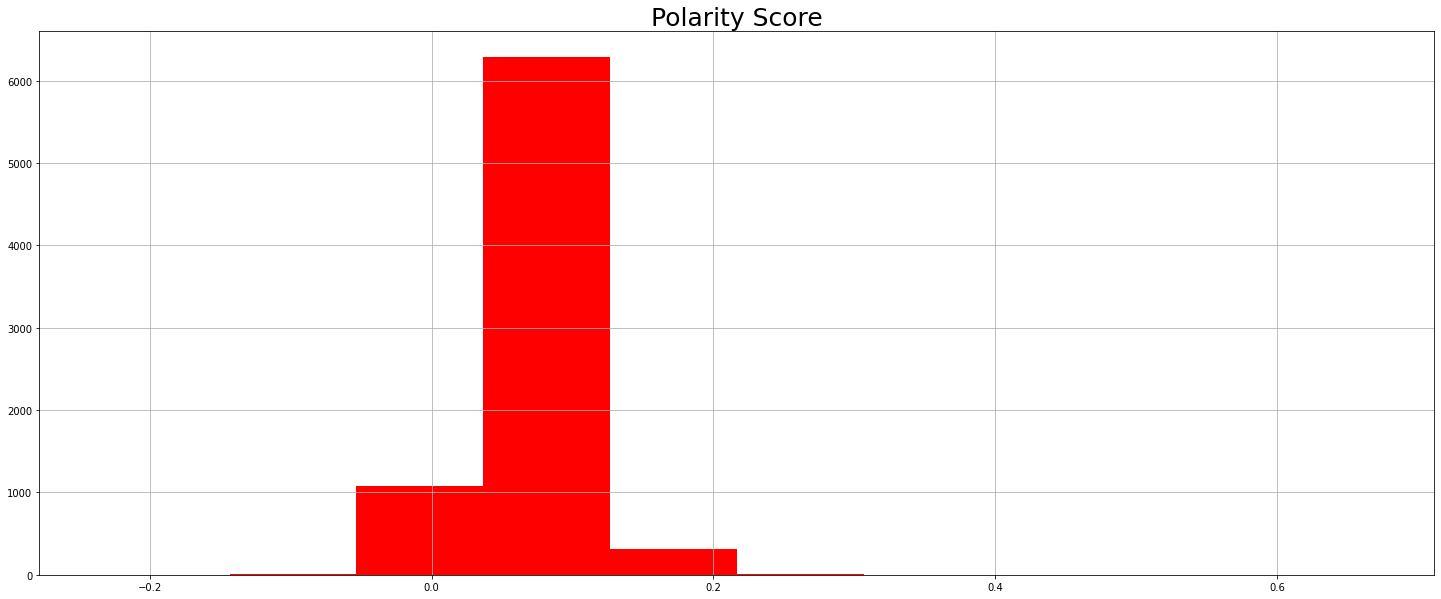

In [64]:
plt.figure(figsize=(25,10))
headlines_df['Polarity'].hist(color='red')
plt.title('Polarity Score',fontsize=25)
plt.show()

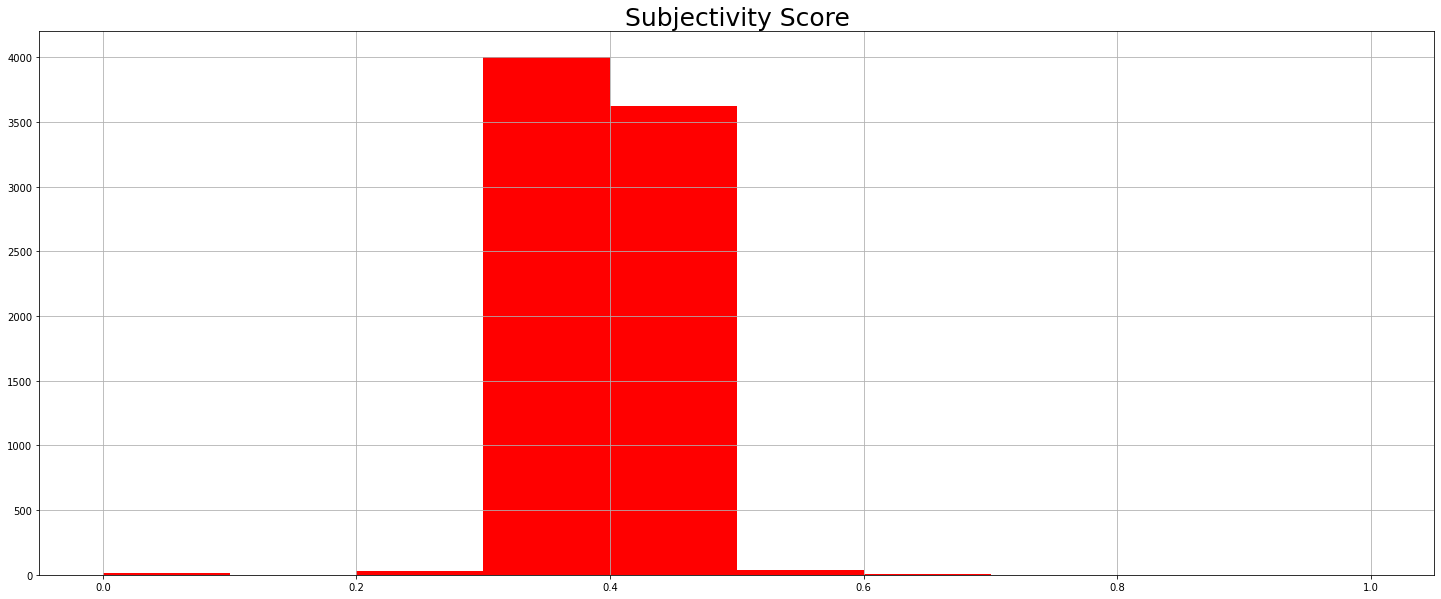

In [65]:
plt.figure(figsize=(25,10))
headlines_df['Subjectivity'].hist(color='red')
plt.title('Subjectivity Score', fontsize=25)
plt.show()

In [66]:
sia = SentimentIntensityAnalyzer()

In [67]:
headlines_df['Compound'] = [sia.polarity_scores(v)['compound'] for v in headlines_df['News']]

In [68]:
headlines_df['Negative'] = [sia.polarity_scores(v)['neg'] for v in headlines_df['News']]

In [69]:
headlines_df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in headlines_df['News']]

In [70]:
headlines_df['Positive'] = [sia.polarity_scores(v)['pos'] for v in headlines_df['News']]

In [71]:
df_merge = pd.merge(headlines_df, stock_df, how='inner', on='Date')

In [72]:
final_df = df_merge[['Close', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]

In [73]:
scaler = MinMaxScaler()

In [77]:
stock_df.head()

,Date,High,Low,Open,Close,Volume
0,2001-01-02,4028.570068,3929.370117,3953.219971,4018.879883,0.0
1,2001-01-03,4067.659912,3977.580078,3977.580078,4060.020020,0.0
2,2001-01-04,4180.970215,4109.549805,4180.970215,4115.370117,0.0
3,2001-01-05,4195.009766,4115.350098,4116.339844,4183.729980,0.0
4,2001-01-08,4206.720215,4101.529785,4164.759766,4120.430176,0.0


In [137]:
X = stock_df.drop('Close', axis=1)
y = stock_df['Close']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))

In [ ]:
ad = AdaBoostRegressor()
ad.fit(X_train, y_train)

In [ ]:
y_pred = ad.predict(X_test)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))

In [ ]:
xg = XGBRegressor()
xg.fit(X_train, y_train)

In [ ]:
y_pred = xg.predict(X_test)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))

In [ ]:
rms = np.sqrt(mean_squared_error(test_log, prediction))
print('RMSE:', rms)

#### Textual Analysis

In [31]:
news_df = pd.read_csv('india_news_headlines.csv')

In [32]:
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [33]:
news_df.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [34]:
news_df.shape

(3650970, 3)

In [35]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [36]:
news_df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [37]:
news_df.duplicated().sum()

24860

In [38]:
news_df = news_df.drop_duplicates()

In [39]:
news_df.drop('headline_category', axis=1, inplace=True)

In [40]:
news_df.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [41]:
news_df.rename(columns={'publish_date':'Date', 'headline_text':'News'}, inplace=True)

In [42]:
news_df.head()

,Date,News
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [43]:
news_df.tail()

,Date,News
3650965,20220331,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,Tamil Nadu sees marginal rise of Covid cases w...


In [44]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3626110 entries, 0 to 3650969
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    int64 
 1   News    object
dtypes: int64(1), object(1)
memory usage: 83.0+ MB


In [45]:
news_df.duplicated().sum()

137238

In [113]:
# news_df = news_df.drop_duplicates()

In [94]:
news_df['Date'] = news_df['Date'].apply(str)

In [95]:
news_df['Date'] = pd.to_datetime(news_df['Date'])

In [46]:
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y%m%d')

In [47]:
news_df['News'] = news_df.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news_df = news_df.drop_duplicates() 
news_df.reset_index(inplace=True, drop=True)

In [87]:
ps = PorterStemmer()

In [88]:
c = []
for i in range(0, len(news_df['News'])):
    news = re.sub('[^a-zA-Z]', ' ', news_df['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news = ' '.join(news)
    c.append(news)

In [89]:
news_df['News'] = pd.Series(c)

In [90]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [91]:
news_df['Subjectivity'] = news_df['News'].apply(getSubjectivity)
news_df['Polarity'] = news_df['News'].apply(getPolarity)

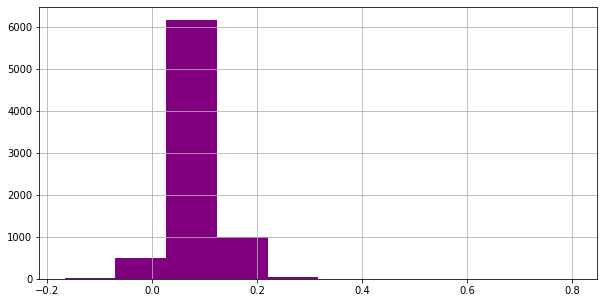

In [92]:
plt.figure(figsize=(10,5))
news_df['Polarity'].hist(color='purple')
plt.show()

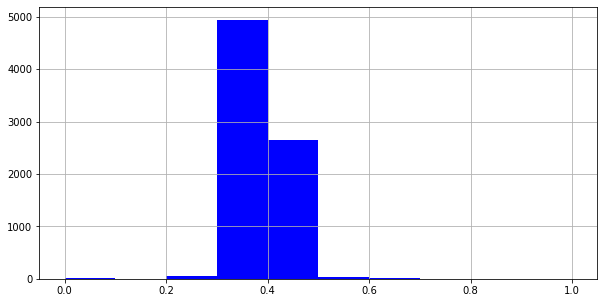

In [93]:
plt.figure(figsize=(10,5))
news_df['Subjectivity'].hist(color='blue')
plt.show()

In [ ]:
# sia = SentimentIntensityAnalyzer()

news_df['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
news_df['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
news_df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
news_df['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]

In [96]:
df_merge_1 = pd.merge(stock_df, news_df, how='inner', on='Date')

In [97]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]

In [98]:
scaler = MinMaxScaler()
new_df = pd.DataFrame(scaler.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.028631,0.298684,0.564593,0.008050,0.317568,0.792,0.111842
1,0.029461,0.392857,0.439935,0.054503,0.346847,0.739,0.175987
2,0.030578,0.478086,0.440639,0.958948,0.229730,0.784,0.187500
3,0.031957,0.470967,0.672916,0.987699,0.286036,0.690,0.300987
4,0.030680,0.421415,0.347458,0.053303,0.261261,0.806,0.128289


In [99]:
X = new_df.drop('Close', axis=1)
y = new_df['Close']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [120]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

print(mean_squared_error(rf_prediction, y_test))

0.019944558242046138


In [126]:
ad = AdaBoostRegressor()
ad.fit(X_train, y_train)
ad_prediction = ad.predict(X_test)

print(mean_squared_error(ad_prediction, y_test))

0.02502119627128766


In [127]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

print(mean_squared_error(dt_prediction, y_test))

0.038564199710702816


In [129]:
xg = XGBRegressor()
xg.fit(X_train, y_train)
xg_prediction = xg.predict(X_test)

print(mean_squared_error(xg_prediction, y_test))

0.022537489492190102


In [136]:
lg = LGBMRegressor()
lg.fit(X_train, y_train)
lg_prediction = xg.predict(X_test)

print(mean_squared_error(lg_prediction, y_test))

0.022537489492190102


#### `Thank You`